In [1]:
import numpy as np
import matplotlib.pyplot as plt
import log_bessel as lb
from scipy.integrate import quad, fixed_quad

# TESTS

In [2]:
v_to_test = np.array([0,3.15e-7, 2.62e-6, 1.3e-5, 9.2e-5, 0.0026,
                      0.0843, 0.17345, 1, 1.63, 7.42, 42.42424, 86.5,
                      113.8, 148.7565, 180.6, 246.3, 300.5, 513.6,
                      712.456, 714.456, 1235.6,8656, 15330.75,
                      37634.2 ,85323])

z_to_test = np.array([1.48e-7, 3.6e-6, 7.248e-5, 4.32e-4, 8.7e-3, 0.04523, 0.17532,
                      1, 3, 11.32465, 105.6, 1038.4, 4236, 11457.6, 62384, 105321.6,
                      158742.3, 196754,  1.98e6])

In [28]:
def logdiffexp(x1,x2):
    
    print('-----logdiffexp first term-----')
    print(x1)
    print('\n')
    print('-----Direct difference-----')
    print(x2-x1 < 0)
    print('\n')
    print('-----logdiffexp second term exponential-----')
    print(-np.exp(-(x1-x2)))
    print('\n')
    
    return x1+np.log1p(-np.exp((x1-x2)))

def forward_recursion(v,z):
    
    first, _ = lb.log_bessel_k(v+2,z)
    second = np.log(2) + np.log(v+1) - np.log(z) + lb.log_bessel_k(v+1,z)[0]
    indeces = lb.log_bessel_k(v+1,z)[1]
    
    #print('-------Forward recursion first term-------')
    #print(second)
    #print('\n')
    #print('-------Forward recursion second term-------')
    #print(second)
    #print('\n')
    #print('-------Diff of terms-------')
    #print(first-second)
    #print('\n')
    
    return logdiffexp(first,second), indeces

def backward_recursion(v, z):
    
    first, indeces = lb.log_bessel_k(v-2, z)
    second = np.log(2)+np.log(v-1)-np.log(z)+lb.log_bessel_k(v-1, z)[0]
    
    return np.logaddexp(first, second), indeces

def recursion_test(v, z):
    
    rhs = np.zeros(np.shape(v))
    
    i_forward = v <= 1.
    i_backward = v > 1.
    
    rhs[i_forward], indices_forward = forward_recursion(v[i_forward], z)
    rhs[i_backward], indices_backward = backward_recursion(v[i_backward], z)
    
    print('-------RHS forward-------')
    print(rhs[i_forward])
    print('\n')
    
    lhs = lb.log_bessel_k(v, z)[0]
    
    return lhs/rhs, indices_forward, indices_backward

In [120]:
scipy_max_z = 200
scipy_max_v = 700

asymp_v_slope = 1
asymp_v_intercept = 8

asymp_z_slope = 1
asymp_z_intercept = -3
asymp_z_log_min_v = 10

rothwell_max_v = 50
rothwell_max_z = 100000
rothwell_max_log_z_over_v = 300

trapezoid_min_v = 100

Text(0, 0.5, '$\\nu$')

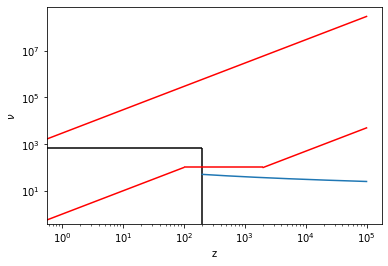

In [138]:
v = np.linspace(0,100000, 100000)
z = np.linspace(0,100000, 100000)

def rothwell_bound(z):
    
    return 300 / (np.log(z)+np.log(2)) + 0.5


trap_low = np.exp(-3)*z
trap_high = np.exp(8)*z

plt.yscale('log')
plt.xscale('log')

plt.vlines(scipy_max_z, 0, scipy_max_v)
plt.hlines(scipy_max_v, 0, scipy_max_z)
plt.plot(z[z>200], rothwell_bound(z[z>200]))

plt.plot(z[trap_low>=100], trap_low[trap_low>=100], c='r')
plt.plot(z, trap_high, c='r')
plt.hlines(trapezoid_min_v, 100, 2009, color='r')
plt.plot(z[z<=100],v[v<=100], c='r')

#plt.plot(z, v)

plt.xlabel('z')
plt.ylabel(r'$\nu$')

In [105]:
np.max(rothwell_bound(z[z>200]))

50.571146533085596

In [119]:
trapezoid_min_v

100000